## Questão 01

**|pe| ≤ |sbv| ≤ |sb| ≤ Cn,m**

Encontre os pontos extremos, as soluções básicas e as soluções básicas viáveis do PPL abaixo e verifique que as desigualdades acima são atendidas

minimizar -x1 -2x2

sujeito a: 

x1 + x2 + x3 = 4

2*x1 + x2 + x4 = 6

x1 + x5 = 3

x1, x2, x3, x4, x5 >= 0

In [1]:
from docplex.mp.model import Model
import cplex

m = Model(name='Questão-01')
x_1 = m.integer_var(name='x_1')
x_2 = m.integer_var(name='x_2')
x_3 = m.integer_var(name='x_3')
x_4 = m.integer_var(name='x_4')
x_5 = m.integer_var(name='x_5')

m.add_constraint(x_1 + x_2 + x_3 == 4)
m.add_constraint(2*x_1 + x_2 + x_4 == 6)
m.add_constraint(x_1 + x_5 == 3)
m.add_constraint(x_1 >= 0)
m.add_constraint(x_2 >= 0)
m.add_constraint(x_3 >= 0)
m.add_constraint(x_4 >= 0)
m.add_constraint(x_5 >= 0)

m.minimize(-x_1 -2*x_2)
m.solve()
print(m.solution)

solution for: Questão-01
objective: -8
x_2=4
x_4=2
x_5=3



### Usando o método de força bruta

1) testar, para cada combinação de m colunas de A, se elas formam uma base; 

2) calcular, para cada base, a solução básica associada a ela; 

3) calcular, para todas as SBV obtidas, o valor da função objetivo.

In [2]:
from math import factorial
from __future__ import print_function
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
A = np.array([[1, 1, 1, 0, 0],
              [2, 1, 0, 1, 0],
              [1, 0, 0, 0, 1]])

In [4]:
m = len(A)
print('m:', m)

n = len(A[0])
print('n:', n)

m: 3
n: 5


In [5]:
combinacoes = factorial(n)/(factorial(m)*(factorial(n-m)))

print('O número máximo de soluções básicas:', combinacoes)

O número máximo de soluções básicas: 10.0


In [6]:
b = np.array([[4], 
              [6],
              [3]])

In [7]:
c = np.array([-1, -2, 0, 0, 0])

In [8]:
def verifica_solucao_viavel(x):
    '''
        Função que verifica se a solução é viável
        
        >>> verifica_solucao_viavel([0, 0, [125.], 0, [125.], [475.], 0])
            Esta é uma solução básica viável
            True
        >> verifica_solucao_viavel([0, 0, 0, [300.], [-950.], 0, [500.]])
            Esta NÃO é uma solução básica viável
            False
        >> verifica_solucao_viavel([1, 0, 1, 0, 1, 0, 0])
            Esta é uma solução básica viável
            True
    '''
    
    xB_bool = []

    for w in range(0, len(x)):
        if(x[w] >= 0):
            xB_bool.append(True)           
        else:
            xB_bool.append(False)

        try:
            if(x[w][0] >= 0):
                xB_bool.append(True)
            else:
                xB_bool.append(False)
        except:
            pass
            
    if(all(xB_bool)):
        print('Esta é uma solução básica viável')
        return True
    else:
        print('Esta NÃO é uma solução básica viável')
        return False

In [9]:
solucoes_viaveis = np.array([[0,0,0], 0,0,0])
todas_solucoes = np.array([[0,0,0], 0,0,0])
cont_x = 0

for w in range(0, n):
    for y in range(w+1, n):
        for z in range(y+1, n):
            
            # Id da solução
            cont_x = cont_x + 1;
            print('\nx', cont_x)
            
            # Conjunto de índices IB
            IB = [w,y,z]
            print('IB =', IB[0]+1, IB[1]+1, IB[2]+1)
            
            # B
            B = np.array([A[0][w], A[0][y], A[0][z]])
            for v in range (1, m):
                B = np.row_stack(tup=(B, [A[v][w], A[v][y], A[v][z]]))
            print('B =', B, '\n')
            
            # Verificando se B é uma base
            v, V =  np.linalg.eig(B)
            if(v.all() == 0):
                print('A matriz B não é uma base')
                print('A linha LD é:')
                print (B[v == 0,:])
                print('\n---------------------------------------------------------------------------\n')
                
                # Colocar na tabela de soluções básicas, com informações vazias
                todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1], cont_x, [], []]))
                continue

            # B-1
            try:
                B1 = np.linalg.inv(B)
                print('B-1 =', B1, '\n')
            except:
                print("B-1 não existe")
                todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1], cont_x, [], []]))
                print('\n---------------------------------------------------------------------------\n')
                continue

            # xB
            xB = B1.dot(b)
            print('xB =', xB, '\n')
            
            # x
            x = []
            for v in range (0, n):              
                if(v == IB[0]):
                    x.append(np.round(xB[0]))
                elif(v == IB[1]):
                    x.append(np.round(xB[1]))
                elif(v == IB[2]):
                    x.append(np.round(xB[2]))
                else:
                    x.append(0)
            print('x =', x, '\n')
                
            # cTx
            cTx = np.transpose(c).dot(x)
            print('cTx =', cTx, '\n')
                
            # Colocar na tabela de soluções básicas
            todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1], cont_x, float(cTx), x]))
            
            # Se a solução for viável, colocar na tabela de soluções viáveis
            if(verifica_solucao_viavel(x) == True):
                solucoes_viaveis = np.row_stack((solucoes_viaveis, [[IB[0]+1, IB[1]+1, IB[2]+1], cont_x, float(cTx), x]))
            
            print('\n---------------------------------------------------------------------------\n')



x 1
IB = 1 2 3
B = [[1 1 1]
 [2 1 0]
 [1 0 0]] 

B-1 = [[ 0.  0.  1.]
 [ 0.  1. -2.]
 [ 1. -1.  1.]] 

xB = [[3.]
 [0.]
 [1.]] 

x = [array([3.]), array([0.]), array([1.]), 0, 0] 

cTx = [-3.] 

Esta é uma solução básica viável

---------------------------------------------------------------------------


x 2
IB = 1 2 4
B = [[1 1 0]
 [2 1 1]
 [1 0 0]] 

B-1 = [[ 0.  0.  1.]
 [ 1.  0. -1.]
 [-1.  1. -1.]] 

xB = [[ 3.]
 [ 1.]
 [-1.]] 

x = [array([3.]), array([1.]), 0, array([-1.]), 0] 

cTx = [-5.] 

Esta NÃO é uma solução básica viável

---------------------------------------------------------------------------


x 3
IB = 1 2 5
B = [[1 1 0]
 [2 1 0]
 [1 0 1]] 

B-1 = [[-1.  1.  0.]
 [ 2. -1.  0.]
 [ 1. -1.  1.]] 

xB = [[2.]
 [2.]
 [1.]] 

x = [array([2.]), array([2.]), 0, 0, array([1.])] 

cTx = [-6.] 

Esta é uma solução básica viável

---------------------------------------------------------------------------


x 4
IB = 1 3 4
B = [[1 1 0]
 [2 0 1]
 [1 0 0]] 

B-1 = [[ 0.  0.  1.]


<ipython-input-9-4fa4422366a6>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  solucoes_viaveis = np.array([[0,0,0], 0,0,0])
<ipython-input-9-4fa4422366a6>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  todas_solucoes = np.array([[0,0,0], 0,0,0])
<ipython-input-9-4fa4422366a6>:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cTx

In [10]:
## Formatando os valores do todas_solucoes para sair bonitinho na tabela

for x in range(1, len(todas_solucoes)):
    try:
        todas_solucoes[x][2] = todas_solucoes[x][2][0]
    except:
        pass

for x in range(1, len(todas_solucoes)):
    for y in range(0, len(todas_solucoes)):
        try:
            todas_solucoes[x][3][y] = todas_solucoes[x][3][y][0]
        except:
            pass

todas_solucoes

array([[[0, 0, 0], 0, 0, 0],
       [[1, 2, 3], 1, -3.0, [3.0, 0.0, 1.0, 0, 0]],
       [[1, 2, 4], 2, -5.0, [3.0, 1.0, 0, -1.0, 0]],
       [[1, 2, 5], 3, -6.0, [2.0, 2.0, 0, 0, 1.0]],
       [[1, 3, 4], 4, -3.0, [3.0, 0, 1.0, 0.0, 0]],
       [[1, 3, 5], 5, -3.0, [3.0, 0, 1.0, 0, 0.0]],
       [[1, 4, 5], 6, -4.0, [4.0, 0, 0, -2.0, -1.0]],
       [[2, 3, 4], 7, [], []],
       [[2, 3, 5], 8, -12.0, [0, 6.0, -2.0, 0, 3.0]],
       [[2, 4, 5], 9, -8.0, [0, 4.0, 0, 2.0, 3.0]],
       [[3, 4, 5], 10, 0.0, [0, 0, 4.0, 6.0, 3.0]]], dtype=object)

In [11]:
print("Todas as soluções:")

todas_solucoes = pd.DataFrame(todas_solucoes[1:,:], columns=['Conjunto de índices base', 'Id da solução', 'cTx', 'Solução básica associada à base'])
todas_solucoes.sort_values(by=['Id da solução'])

todas_solucoes

Todas as soluções:


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2, 3]",1,-3.0,"[3.0, 0.0, 1.0, 0, 0]"
1,"[1, 2, 4]",2,-5.0,"[3.0, 1.0, 0, -1.0, 0]"
2,"[1, 2, 5]",3,-6.0,"[2.0, 2.0, 0, 0, 1.0]"
3,"[1, 3, 4]",4,-3.0,"[3.0, 0, 1.0, 0.0, 0]"
4,"[1, 3, 5]",5,-3.0,"[3.0, 0, 1.0, 0, 0.0]"
5,"[1, 4, 5]",6,-4.0,"[4.0, 0, 0, -2.0, -1.0]"
6,"[2, 3, 4]",7,[],[]
7,"[2, 3, 5]",8,-12.0,"[0, 6.0, -2.0, 0, 3.0]"
8,"[2, 4, 5]",9,-8.0,"[0, 4.0, 0, 2.0, 3.0]"
9,"[3, 4, 5]",10,0.0,"[0, 0, 4.0, 6.0, 3.0]"


In [12]:
qtd_solucoes_basicas = list(map(lambda z, sb=0: sb if z == [] else sb+1, todas_solucoes.loc[:, 'cTx'])).count(1)

print("\nQuantidade de soluções básicas: ", qtd_solucoes_basicas)


Quantidade de soluções básicas:  9


In [13]:
## Formatando os valores do solucoes_viaveis para sair bonitinho na tabela

for x in range(1, len(solucoes_viaveis)):
    try:
        solucoes_viaveis[x][2] = solucoes_viaveis[x][2][0]
    except:
        pass

for x in range(1, len(solucoes_viaveis)):
    for y in range(0, len(solucoes_viaveis)):
        try:
            solucoes_viaveis[x][3][y] = solucoes_viaveis[x][3][y][0]
        except:
            pass

solucoes_viaveis

array([[[0, 0, 0], 0, 0, 0],
       [[1, 2, 3], 1, -3.0, [3.0, 0.0, 1.0, 0, 0]],
       [[1, 2, 5], 3, -6.0, [2.0, 2.0, 0, 0, 1.0]],
       [[1, 3, 4], 4, -3.0, [3.0, 0, 1.0, 0.0, 0]],
       [[1, 3, 5], 5, -3.0, [3.0, 0, 1.0, 0, 0.0]],
       [[2, 4, 5], 9, -8.0, [0, 4.0, 0, 2.0, 3.0]],
       [[3, 4, 5], 10, 0.0, [0, 0, 4.0, 6.0, 3.0]]], dtype=object)

In [14]:
print("Soluções viáveis:")

solucoes_viaveis = pd.DataFrame(solucoes_viaveis[1:,:], columns=['Conjunto de índices base', 'Id da solução', 'cTx', 'Solução básica associada à base'])
solucoes_viaveis.sort_values(by=['Id da solução'])

solucoes_viaveis

Soluções viáveis:


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2, 3]",1,-3.0,"[3.0, 0.0, 1.0, 0, 0]"
1,"[1, 2, 5]",3,-6.0,"[2.0, 2.0, 0, 0, 1.0]"
2,"[1, 3, 4]",4,-3.0,"[3.0, 0, 1.0, 0.0, 0]"
3,"[1, 3, 5]",5,-3.0,"[3.0, 0, 1.0, 0, 0.0]"
4,"[2, 4, 5]",9,-8.0,"[0, 4.0, 0, 2.0, 3.0]"
5,"[3, 4, 5]",10,0.0,"[0, 0, 4.0, 6.0, 3.0]"


In [15]:
qtd_solucoes_viaveis = len(solucoes_viaveis)
print("\nQuantidade de soluções viáveis: ", qtd_solucoes_viaveis)


Quantidade de soluções viáveis:  6


In [16]:
## Digite 1 se você deseja maximizar ou 2 se você deseja minimizar
entrada = 2

if(entrada == 1):
    id_solucao_otima = solucoes_viaveis['cTx'].astype(float).argmax()
elif(entrada == 2):
    id_solucao_otima = solucoes_viaveis['cTx'].astype(float).argmin()
    
solucao_otima = solucoes_viaveis['cTx'][id_solucao_otima]

print('Solução Ótima:', solucao_otima)

Solução Ótima: -8.0


In [17]:
print('\nSoluções que geram a solução ótima:\n')

geram_solucoes_otimas = solucoes_viaveis.loc[solucoes_viaveis['cTx'] == solucao_otima, :]

geram_solucoes_otimas


Soluções que geram a solução ótima:



,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
4,"[2, 4, 5]",9,-8.0,"[0, 4.0, 0, 2.0, 3.0]"


In [18]:
print("\nQuantidade de soluções viáveis: ", qtd_solucoes_viaveis)
print("\nQuantidade de soluções básicas: ", qtd_solucoes_basicas)
print('\nO número máximo de soluções básicas:', combinacoes)
print('\nSolução Ótima:', solucao_otima)


Quantidade de soluções viáveis:  6

Quantidade de soluções básicas:  9

O número máximo de soluções básicas: 10.0

Solução Ótima: -8.0


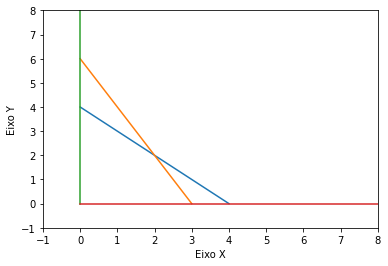

In [19]:
plt.plot([0, 4], [4, 0]) # x1 + x2 + x3 = 4
plt.plot([0, 3], [6, 0]) # 2x1 + x2 + x4 = 6
plt.plot([0, 0], [0, 8]) # x2 >= 0
plt.plot([0, 8], [0, 0]) # x1 >= 0

plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.axis([-1, 8, -1, 8]) # [xmin, xmax, ymin, ymax]

plt.show()

In [20]:
qtd_pontos_extremos = 4

# |pe| ≤ |sbv| ≤ |sb| ≤ Cn,m
print(qtd_pontos_extremos, '<=', qtd_solucoes_viaveis, '<=', qtd_solucoes_basicas, '<=', combinacoes)

4 <= 6 <= 9 <= 10.0


## Questão 02

                                        |pe| ≤ |sbv| ≤ |sb| ≤ Cn,m

Encontre os pontos extremos, as soluções básicas e as soluções básicas viáveis do PPL abaixo e verifique que as desigualdades acima são atendidas

maximizar 5x1 + 2x2

sujeito a: 

x1 - x2 >= 0
x1 <= 4

x1, x2 >= 0

In [21]:
from docplex.mp.model import Model
import cplex

m = Model(name='Questão-01')
x_1 = m.integer_var(name='x_1')
x_2 = m.integer_var(name='x_2')

m.add_constraint(x_1 - x_2 >= 0)
m.add_constraint(x_1 <= 4)
m.add_constraint(x_1 >= 0)
m.add_constraint(x_2 >= 0)

m.maximize(5*x_1 + 2*x_2)
m.solve()
print(m.solution)

solution for: Questão-01
objective: 28
x_1=4
x_2=4



### Usando o método de força bruta

1) testar, para cada combinação de m colunas de A, se elas formam uma base; 

2) calcular, para cada base, a solução básica associada a ela; 

3) calcular, para todas as SBV obtidas, o valor da função objetivo.

**Forma Padrão:**

maximizar 5x1 + 2x2

sujeito a: 

x1 - x2 - x3 = 0
x1 + x4 = 4

x1, x2, x3, x4 >= 0

In [22]:
from math import factorial
from __future__ import print_function
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [23]:
A = np.array([[1, -1, -1, 0],
              [1, 0, 0, 1]])

In [24]:
b = np.array([[0], 
              [4]])

In [25]:
c = np.array([5, 2, 0, 0])

In [26]:
m = len(A)
print('m:', m)

n = len(A[0])
print('n:', n)

combinacoes = factorial(n)/(factorial(m)*(factorial(n-m)))

print('O número máximo de soluções básicas:', combinacoes)

m: 2
n: 4
O número máximo de soluções básicas: 6.0


In [27]:
def verifica_solucao_viavel(x):
    '''
        Função que verifica se a solução é viável
        
        >>> verifica_solucao_viavel([0, 0, [125.], 0, [125.], [475.], 0])
            Esta é uma solução básica viável
            True
        >> verifica_solucao_viavel([0, 0, 0, [300.], [-950.], 0, [500.]])
            Esta NÃO é uma solução básica viável
            False
        >> verifica_solucao_viavel([1, 0, 1, 0, 1, 0, 0])
            Esta é uma solução básica viável
            True
    '''
    
    xB_bool = []

    for w in range(0, len(x)):
        if(x[w] >= 0):
            xB_bool.append(True)           
        else:
            xB_bool.append(False)

        try:
            if(x[w][0] >= 0):
                xB_bool.append(True)
            else:
                xB_bool.append(False)
        except:
            pass
            
    if(all(xB_bool)):
        print('Esta é uma solução básica viável')
        return True
    else:
        print('Esta NÃO é uma solução básica viável')
        return False

In [28]:
solucoes_viaveis = np.array([[0,0,0], 0,0,0])
todas_solucoes = np.array([[0,0,0], 0,0,0])
cont_x = 0

for w in range(0, n):
    for y in range(w+1, n):
            
            # Id da solução
            cont_x = cont_x + 1;
            print('\nx', cont_x)
            
            # Conjunto de índices IB
            IB = [w,y]
            print('IB =', IB[0]+1, IB[1]+1)
            
            # B
            B = np.array([A[0][w], A[0][y]])
            for v in range (1, m):
                B = np.row_stack(tup=(B, [A[v][w], A[v][y]]))
            print('B =', B, '\n')
            
            # Verificando se B é uma base
            v, V =  np.linalg.eig(B)
            if(v.all() == 0):
                print('A matriz B não é uma base')
                print('A linha LD é:')
                print (B[v == 0,:])
                print('\n---------------------------------------------------------------------------\n')
                
                # Colocar na tabela de soluções básicas, com informações vazias
                todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1], cont_x, [], []]))
                continue

            # B-1
            B1 = np.linalg.inv(B)
            print('B-1 =', B1, '\n')

            # xB
            xB = B1.dot(b)
            print('xB =', xB, '\n')
            
            # x
            x = []
            for v in range (0, n):              
                if(v == IB[0]):
                    x.append(np.round(xB[0]))
                elif(v == IB[1]):
                    x.append(np.round(xB[1]))
                else:
                    x.append(0)
            print('x =', x, '\n')
                
            # cTx
            cTx = np.transpose(c).dot(x)
            print('cTx =', cTx, '\n')
                
            # Colocar na tabela de soluções básicas
            todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1], cont_x, cTx, x]))
            
            # Se a solução for viável, colocar na tabela de soluções viáveis
            if(verifica_solucao_viavel(x) == True):
                solucoes_viaveis = np.row_stack((solucoes_viaveis, [[IB[0]+1, IB[1]+1], cont_x, cTx, x]))
            
            print('\n---------------------------------------------------------------------------\n')



x 1
IB = 1 2
B = [[ 1 -1]
 [ 1  0]] 

B-1 = [[ 0.  1.]
 [-1.  1.]] 

xB = [[4.]
 [4.]] 

x = [array([4.]), array([4.]), 0, 0] 

cTx = [28.] 

Esta é uma solução básica viável

---------------------------------------------------------------------------


x 2
IB = 1 3
B = [[ 1 -1]
 [ 1  0]] 

B-1 = [[ 0.  1.]
 [-1.  1.]] 

xB = [[4.]
 [4.]] 

x = [array([4.]), 0, array([4.]), 0] 

cTx = [20.] 

Esta é uma solução básica viável

---------------------------------------------------------------------------


x 3
IB = 1 4
B = [[1 0]
 [1 1]] 

B-1 = [[ 1.  0.]
 [-1.  1.]] 

xB = [[0.]
 [4.]] 

x = [array([0.]), 0, 0, array([4.])] 

cTx = [0.] 

Esta é uma solução básica viável

---------------------------------------------------------------------------


x 4
IB = 2 3
B = [[-1 -1]
 [ 0  0]] 

A matriz B não é uma base
A linha LD é:
[[0 0]]

---------------------------------------------------------------------------


x 5
IB = 2 4
B = [[-1  0]
 [ 0  1]] 

B-1 = [[-1. -0.]
 [ 0.  1.]] 

xB = [[0

<ipython-input-28-dd70da8a00ff>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  solucoes_viaveis = np.array([[0,0,0], 0,0,0])
<ipython-input-28-dd70da8a00ff>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  todas_solucoes = np.array([[0,0,0], 0,0,0])
<ipython-input-28-dd70da8a00ff>:54: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  

In [29]:
## Formatando os valores do todas_solucoes para sair bonitinho na tabela

for x in range(1, len(todas_solucoes)):
    try:
        todas_solucoes[x][2] = todas_solucoes[x][2][0]
    except:
        pass

for x in range(1, len(todas_solucoes)):
    for y in range(0, len(todas_solucoes)):
        try:
            todas_solucoes[x][3][y] = todas_solucoes[x][3][y][0]
        except:
            pass

todas_solucoes

array([[[0, 0, 0], 0, 0, 0],
       [[1, 2], 1, 28.0, [4.0, 4.0, 0, 0]],
       [[1, 3], 2, 20.0, [4.0, 0, 4.0, 0]],
       [[1, 4], 3, 0.0, [0.0, 0, 0, 4.0]],
       [[2, 3], 4, [], []],
       [[2, 4], 5, 0.0, [0, 0.0, 0, 4.0]],
       [[3, 4], 6, 0.0, [0, 0, 0.0, 4.0]]], dtype=object)

In [30]:
print("Todas as soluções:")

todas_solucoes = pd.DataFrame(todas_solucoes[1:,:], columns=['Conjunto de índices base', 'Id da solução', 'cTx', 'Solução básica associada à base'])
todas_solucoes.sort_values(by=['Id da solução'])

todas_solucoes

Todas as soluções:


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2]",1,28.0,"[4.0, 4.0, 0, 0]"
1,"[1, 3]",2,20.0,"[4.0, 0, 4.0, 0]"
2,"[1, 4]",3,0.0,"[0.0, 0, 0, 4.0]"
3,"[2, 3]",4,[],[]
4,"[2, 4]",5,0.0,"[0, 0.0, 0, 4.0]"
5,"[3, 4]",6,0.0,"[0, 0, 0.0, 4.0]"


In [31]:
qtd_solucoes_basicas = list(map(lambda z, sb=0: sb if z == [] else sb+1, todas_solucoes.loc[:, 'cTx'])).count(1)

print("\nQuantidade de soluções básicas: ", qtd_solucoes_basicas)


Quantidade de soluções básicas:  5


<ipython-input-31-243826ed9650>:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  qtd_solucoes_basicas = list(map(lambda z, sb=0: sb if z == [] else sb+1, todas_solucoes.loc[:, 'cTx'])).count(1)


In [32]:
## Formatando os valores do solucoes_viaveis para sair bonitinho na tabela

for x in range(1, len(solucoes_viaveis)):
    try:
        solucoes_viaveis[x][2] = solucoes_viaveis[x][2][0]
    except:
        pass

for x in range(1, len(solucoes_viaveis)):
    for y in range(0, len(solucoes_viaveis)):
        try:
            solucoes_viaveis[x][3][y] = solucoes_viaveis[x][3][y][0]
        except:
            pass

solucoes_viaveis

array([[[0, 0, 0], 0, 0, 0],
       [[1, 2], 1, 28.0, [4.0, 4.0, 0, 0]],
       [[1, 3], 2, 20.0, [4.0, 0, 4.0, 0]],
       [[1, 4], 3, 0.0, [0.0, 0, 0, 4.0]],
       [[2, 4], 5, 0.0, [0, 0.0, 0, 4.0]],
       [[3, 4], 6, 0.0, [0, 0, 0.0, 4.0]]], dtype=object)

In [33]:
print("Soluções viáveis:")

solucoes_viaveis = pd.DataFrame(solucoes_viaveis[1:,:], columns=['Conjunto de índices base', 'Id da solução', 'cTx', 'Solução básica associada à base'])
solucoes_viaveis.sort_values(by=['Id da solução'])

solucoes_viaveis

Soluções viáveis:


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2]",1,28.0,"[4.0, 4.0, 0, 0]"
1,"[1, 3]",2,20.0,"[4.0, 0, 4.0, 0]"
2,"[1, 4]",3,0.0,"[0.0, 0, 0, 4.0]"
3,"[2, 4]",5,0.0,"[0, 0.0, 0, 4.0]"
4,"[3, 4]",6,0.0,"[0, 0, 0.0, 4.0]"


In [34]:
qtd_solucoes_viaveis = len(solucoes_viaveis)
print("\nQuantidade de soluções viáveis: ", qtd_solucoes_viaveis)


Quantidade de soluções viáveis:  5


In [35]:
## Digite 1 se você deseja maximizar ou 2 se você deseja minimizar
entrada = 1

if(entrada == 1):
    id_solucao_otima = solucoes_viaveis['cTx'].astype(float).argmax()
elif(entrada == 2):
    id_solucao_otima = solucoes_viaveis['cTx'].astype(float).argmin()
    
solucao_otima = solucoes_viaveis['cTx'][id_solucao_otima]

print('Solução Ótima:', solucao_otima)

Solução Ótima: 28.0


In [36]:
print('\nSoluções que geram a solução ótima:\n')

geram_solucoes_otimas = solucoes_viaveis.loc[solucoes_viaveis['cTx'] == solucao_otima, :]
geram_solucoes_otimas


Soluções que geram a solução ótima:



,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2]",1,28.0,"[4.0, 4.0, 0, 0]"


In [37]:
print("\nQuantidade de soluções viáveis: ", qtd_solucoes_viaveis)
print("\nQuantidade de soluções básicas: ", qtd_solucoes_basicas)
print('\nO número máximo de soluções básicas:', combinacoes)
print('\nSolução Ótima:', solucao_otima)


Quantidade de soluções viáveis:  5

Quantidade de soluções básicas:  5

O número máximo de soluções básicas: 6.0

Solução Ótima: 28.0


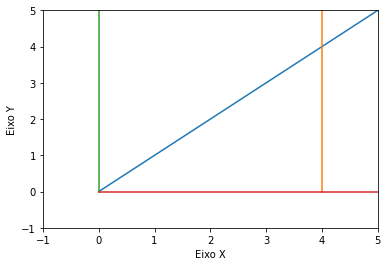

In [38]:
plt.plot([0, 5], [0, 5]) # x1 + x4 = 4
plt.plot([4, 4], [0, 5]) # x1 - x2 - x3 = 0
plt.plot([0, 0], [0, 5]) # y >= 0
plt.plot([0, 5], [0, 0]) # x >= 0

plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.axis([-1, 5, -1, 5]) # [xmin, xmax, ymin, ymax]

plt.show()

In [39]:
qtd_pontos_extremos = 3

# |pe| ≤ |sbv| ≤ |sb| ≤ Cn,m
print(qtd_pontos_extremos, '<=', qtd_solucoes_viaveis, '<=', qtd_solucoes_basicas, '<=', combinacoes)

3 <= 5 <= 5 <= 6.0
